In [5]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'nclass': ['A', 'B' , np.nan, 'B', 'A'],
                   'score': [5,4,3,4,np.nan]})


In [6]:
df['score'] +1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [7]:
pd.isna(df)

,nclass,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [8]:
pd.isna(df).sum()

nclass    1
score     1
dtype: int64

In [9]:
df.dropna(subset=['score'])

,nclass,score
0,A,5.0
1,B,4.0
2,NaN,3.0
3,B,4.0


In [10]:
df_nomiss = df.dropna(subset=['score'])
df_nomiss['score']+1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [11]:
df_nomiss = df.dropna(subset=['score','nclass'])
df_nomiss

,nclass,score
0,A,5.0
1,B,4.0
3,B,4.0


In [13]:
exam = pd.read_csv('exam.csv')
exam.loc[[2,7,14],['front']] = np.nan
exam

,id,nclass,front,back,design
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [14]:
exam['front'].mean()

np.float64(55.23529411764706)

In [15]:
exam['front'] = exam['front'].fillna(55)
exam

,id,nclass,front,back,design
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [17]:
exam['front'].isna().sum()

np.int64(0)

In [19]:
df = pd.DataFrame({'nclass': [1,2,1,3,2,1],
                   'score': [5,4,3,4,2,6]})
df

,nclass,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [20]:
df['nclass'].value_counts().sort_index()

nclass
1    3
2    2
3    1
Name: count, dtype: int64

In [21]:
df['score'].value_counts().sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

In [22]:
df['nclass'] = np.where(df['nclass'] == 3, np.nan, df['nclass'])
df

,nclass,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [23]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,nclass,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [ ]:
df.dropna(subset =  ['nclass', 'score']) \
.groupby('nclass') \
.agg(mean_score = ('score','mean'))

,mean_score
nclass,
1.0,4.0
2.0,3.0


In [35]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 161 kB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 2.3 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


<Axes: ylabel='hwy'>

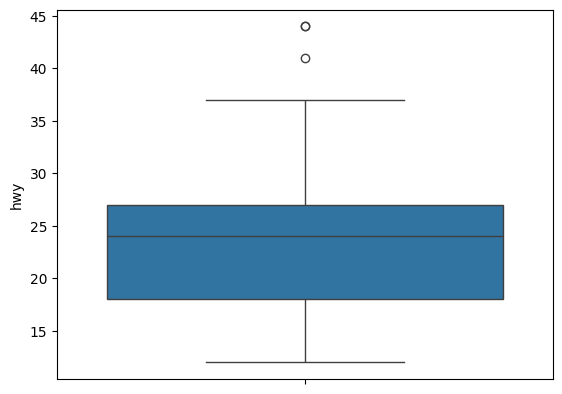

In [ ]:
mpg = pd.read_csv('mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [37]:
pct25 = mpg['hwy'].quantile(.25)
pct25

np.float64(18.0)

In [38]:
pct75 = mpg['hwy'].quantile(.75)
pct75

np.float64(27.0)

In [39]:
iqr = pct75 - pct25
iqr

np.float64(9.0)

In [40]:
pct25-1.5*iqr

np.float64(4.5)

In [41]:
pct75 + 1.5 * iqr

np.float64(40.5)

In [42]:
mpg['hwy'] = np.where((mpg['hwy']<4.5)| (mpg['hwy']> 40.5),
                      np.nan, mpg['hwy'])

mpg['hwy'].isna().sum()

np.int64(3)

In [43]:
mpg.dropna(subset=['hwy']) \
.groupby('drv') \
.agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000
